In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting

torch.manual_seed(1) # set the random seed

class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

In [4]:
for w in pigeon.layer1.parameters():
    print(w)

Parameter containing:
tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
        [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
        [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
        ...,
        [ 0.0267,  0.0186, -0.0326,  ...,  0.0047, -0.0072, -0.0301],
        [-0.0190,  0.0291,  0.0221,  ...,  0.0067,  0.0206,  0.0151],
        [ 0.0226,  0.0331,  0.0182,  ...,  0.0150,  0.0278, -0.0073]],
       requires_grad=True)
Parameter containing:
tensor([-0.0210,  0.0144,  0.0214, -0.0018, -0.0185,  0.0275, -0.0284, -0.0248,
        -0.0180, -0.0168, -0.0226, -0.0093,  0.0211, -0.0311,  0.0002, -0.0010,
         0.0201,  0.0176, -0.0050,  0.0118, -0.0089,  0.0078, -0.0072,  0.0118,
         0.0122, -0.0125,  0.0326,  0.0306,  0.0058, -0.0089],
       requires_grad=True)


In [3]:
for w in pigeon.layer2.parameters():
    print(w)

Parameter containing:
tensor([[ 0.1372,  0.1251,  0.1249,  0.1743, -0.0149, -0.0816, -0.0954,  0.0263,
         -0.1813, -0.1654,  0.0336, -0.1031,  0.0232, -0.0043, -0.1502,  0.0396,
          0.1126,  0.1813, -0.0591,  0.1360, -0.1491,  0.1166, -0.1102, -0.0980,
          0.0192,  0.0422, -0.0400,  0.0573, -0.0854, -0.0637]],
       requires_grad=True)
Parameter containing:
tensor([-0.0425], requires_grad=True)


Processing...
Done!


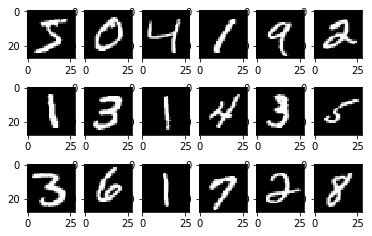

In [2]:
from torchvision import datasets, transforms

# load the training data
mnist_train = datasets.MNIST('data', train=True, download=True)
mnist_train = list(mnist_train)[:2000]

# plot the first 18 images in the training data
for k, (image, label) in enumerate(mnist_train[:18]):
    plt.subplot(3, 6, k+1)
    plt.imshow(image)

In [7]:
image

In [10]:
# transform the image data type to a 28x28 matrix of numbers
img_to_tensor = transforms.ToTensor()
inval = img_to_tensor(image)

In [12]:
inval.shape

torch.Size([1, 28, 28])

In [14]:
outval = pigeon(inval)
outval

tensor([[-0.0549]], grad_fn=<ThAddmmBackward>)

In [15]:
prob = torch.sigmoid(outval)
prob

tensor([[0.4863]], grad_fn=<SigmoidBackward>)

In [16]:
for k, (image, label) in enumerate(mnist_train[:18]):
    img_to_tensor = transforms.ToTensor()
    inval = img_to_tensor(image)
    outval = pigeon(inval)
    prob = torch.sigmoid(outval)
    print(prob)

tensor([[0.5009]], grad_fn=<SigmoidBackward>)
tensor([[0.5219]], grad_fn=<SigmoidBackward>)
tensor([[0.4872]], grad_fn=<SigmoidBackward>)
tensor([[0.5012]], grad_fn=<SigmoidBackward>)
tensor([[0.4940]], grad_fn=<SigmoidBackward>)
tensor([[0.4966]], grad_fn=<SigmoidBackward>)
tensor([[0.5027]], grad_fn=<SigmoidBackward>)
tensor([[0.4993]], grad_fn=<SigmoidBackward>)
tensor([[0.4996]], grad_fn=<SigmoidBackward>)
tensor([[0.4942]], grad_fn=<SigmoidBackward>)
tensor([[0.5167]], grad_fn=<SigmoidBackward>)
tensor([[0.4984]], grad_fn=<SigmoidBackward>)
tensor([[0.5035]], grad_fn=<SigmoidBackward>)
tensor([[0.4890]], grad_fn=<SigmoidBackward>)
tensor([[0.5013]], grad_fn=<SigmoidBackward>)
tensor([[0.5016]], grad_fn=<SigmoidBackward>)
tensor([[0.5127]], grad_fn=<SigmoidBackward>)
tensor([[0.4863]], grad_fn=<SigmoidBackward>)


In [17]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train[:1000]:
    # actual ground truth: is the digit less than 3?
    actual = (label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1
    # update the parameters based on the loss
    loss = criterion(out, actual) # step 2
    loss.backward()               # step 3 (compute the updates for each parameter)
    optimizer.step()              # step 3 (make the updates for each parameter)
    optimizer.zero_grad()         # a clean up step for PyTorch

In [20]:
(image, label) = mnist_train[17]

In [21]:
image

In [25]:
out = pigeon(img_to_tensor(image))
torch.sigmoid(out)

tensor([[0.0013]], grad_fn=<SigmoidBackward>)

In [26]:
# Look at 1000 images that the model **has seen**

error = 0
for (image, label) in mnist_train[:1000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/1000)
print("Training Accuracy:", 1 - error/1000)

Training Error Rate: 0.036
Training Accuracy: 0.964


In [27]:
# Retrain

for (image, label) in mnist_train[:1000]:
    # actual ground truth: is the digit less than 3?
    actual = (label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1
    # update the parameters based on the loss
    loss = criterion(out, actual) # step 2
    loss.backward()               # step 3 (compute the updates for each parameter)
    optimizer.step()              # step 3 (make the updates for each parameter)
    optimizer.zero_grad()         # a clean up step for PyTorch

In [28]:
(image, label) = mnist_train[17]

In [29]:
image

In [30]:
# Look at 1000 images that the model **has seen**

error = 0
for (image, label) in mnist_train[:1000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/1000)
print("Training Accuracy:", 1 - error/1000)

Training Error Rate: 0.016
Training Accuracy: 0.984


In [31]:
## Look at 1000 images that the model **hasn't seen yet**

error = 0
for (image, label) in mnist_train[1000:2000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/1000)
print("Test Accuracy:", 1 - error/1000)

Test Error Rate: 0.057
Test Accuracy: 0.943


In [32]:
pigeon = Pigeon()

In [33]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train[:1000]:
    # actual ground truth: is the digit less than 3?
    actual = (label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1
    # update the parameters based on the loss
    loss = criterion(out, actual) # step 2
    loss.backward()               # step 3 (compute the updates for each parameter)
    optimizer.step()              # step 3 (make the updates for each parameter)
    optimizer.zero_grad()         # a clean up step for PyTorch

In [34]:
# Look at 1000 images that the model **has seen**

error = 0
for (image, label) in mnist_train[:1000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/1000)
print("Training Accuracy:", 1 - error/1000)

Training Error Rate: 0.037
Training Accuracy: 0.963


In [35]:
## Look at 1000 images that the model **hasn't seen yet**

error = 0
for (image, label) in mnist_train[1000:2000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/1000)
print("Test Accuracy:", 1 - error/1000)

Test Error Rate: 0.085
Test Accuracy: 0.915


In [36]:
## I'm going to show you overfitting

pigeon = Pigeon()

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for k in range(100):
    for (image, label) in mnist_train[:10]:
        # actual ground truth: is the digit less than 3?
        actual = (label < 3).reshape([1,1]).type(torch.FloatTensor)
        # pigeon prediction
        out = pigeon(img_to_tensor(image)) # step 1
        # update the parameters based on the loss
        loss = criterion(out, actual) # step 2
        loss.backward()               # step 3 (compute the updates for each parameter)
        optimizer.step()              # step 3 (make the updates for each parameter)
        optimizer.zero_grad()         # a clean up step for PyTorch

In [37]:
# Look at 10 images that the model **has seen**

error = 0
for (image, label) in mnist_train[:10]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/1000)
print("Training Accuracy:", 1 - error/1000)

Training Error Rate: 0.0
Training Accuracy: 1.0


In [38]:
## Look at 1000 images that the model **hasn't seen yet**

error = 0
for (image, label) in mnist_train[1000:2000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/1000)
print("Test Accuracy:", 1 - error/1000)

Test Error Rate: 0.311
Test Accuracy: 0.6890000000000001


In [39]:

class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 100)
        self.layer2 = nn.Linear(100, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

In [40]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train[:1000]:
    # actual ground truth: is the digit less than 3?
    actual = (label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1
    # update the parameters based on the loss
    loss = criterion(out, actual) # step 2
    loss.backward()               # step 3 (compute the updates for each parameter)
    optimizer.step()              # step 3 (make the updates for each parameter)
    optimizer.zero_grad()         # a clean up step for PyTorch

In [41]:
# Look at 1000 images that the model **has seen**

error = 0
for (image, label) in mnist_train[:1000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/1000)
print("Training Accuracy:", 1 - error/1000)

Training Error Rate: 0.034
Training Accuracy: 0.966


In [42]:
## Look at 1000 images that the model **hasn't seen yet**

error = 0
for (image, label) in mnist_train[1000:2000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/1000)
print("Test Accuracy:", 1 - error/1000)

Test Error Rate: 0.085
Test Accuracy: 0.915
